In [3]:
import keras
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
from sklearn import preprocessing
import string
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random

/Users/carolinedavis/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/carolinedavis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/carolinedavis/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/carolinedavis/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/carolinedavis/anaconda3/lib/python3.6/importli

In [4]:
## list of all possible characters
chars = string.ascii_uppercase + string.ascii_lowercase + string.digits

In [5]:
## function decodes binary encoded labels 
def decoder(prediction):
    lb = preprocessing.LabelBinarizer()
    chararray = list(chars)
    lb.fit(chararray)
    decoded_text = lb.inverse_transform(prediction)
    return decoded_text

In [6]:
## given model and an image of 10 characters of text, prints image and decoded text prediction 
def make_prediction(model_name, file_name):
    model = load_model(model_name)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # transform given image to correct imput dimensions/format 
    test_image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    test_image = cv2.resize(test_image, (100,30))
    
    x_test = image.img_to_array(test_image)
    x_test = np.expand_dims(x_test, axis = 0)
    images_test = np.vstack([x_test])
    
    # make/deocde predicition 
    prediction = model.predict(images_test, batch_size=10)
    result = decoder(prediction[0])
    
    # print image and prediction
    display = cv2.imread(file_name)
    plt.figure()
    plt.imshow(display) 
    plt.show()
    print('Text Prediction:' + ''.join(result))
    return 

In [23]:
## can be used to generate random test image 
img = Image.new('RGB', (100, 30), color = (255, 255, 255))
 
d = ImageDraw.Draw(img)
d.text((10,10), ''.join(random.choice(chars) for _ in range(10)), font=ImageFont.load_default(), fill=(0, 0, 0))
 
img.save('test.png')

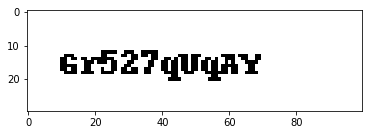

Text Prediction:00000qU000


In [24]:
make_prediction('default.h5', 'test.png')